In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1269.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/623.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/820.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1354.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/45.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/369.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1711.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1173.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1488.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/436.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1409.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/71.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/1055.jpg
/kaggle/input/skin-cancer-malignant-vs-benign/data/test/benign/215.jpg
/

In [3]:
#import all the necessary libraries
'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd
import os
from glob import glob

''' Graphs and charts'''
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  


'''tensorflow/sklearn'''
import tensorflow as tf
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

'''Model for  Transfer Learning'''
from keras.applications.vgg16 import VGG16

'''Image generation and preprocessing'''
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''Result and Performance Analysis'''
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

'''Ignoring Warnings'''
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
Image_size=[224,224] #original VGG model which is trained on the imagenet dataset has this 224*224 size

In [5]:
DIR = '/kaggle/input/skin-cancer-malignant-vs-benign/' #Creating a master directory


In [6]:
train_path='/kaggle/input/skin-cancer-malignant-vs-benign/train/'
test_path='/kaggle/input/skin-cancer-malignant-vs-benign/test/'
#How many classes we have
#Method 1
classes = [i for i in os.listdir(train_path) if '.' not in i]    #Creating classes out of the subfolders inside the directory "DTR"
classes # Different fish species
#Method 2:
print(len(os.listdir(train_path)))
#Method 3
print(len(glob(train_path+'/*')))
Class_No=len(classes)

2
2


Working with 1440 images
Image examples: 
764.jpg


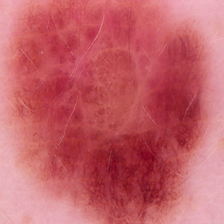

1700.jpg


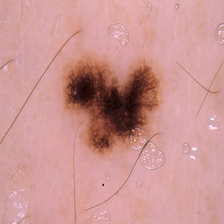

1786.jpg


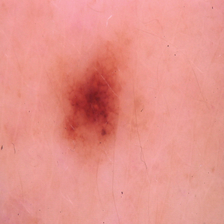

1075.jpg


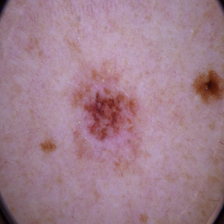

771.jpg


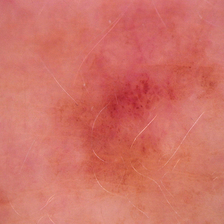

208.jpg


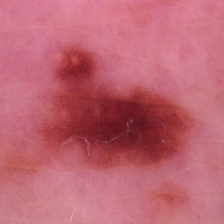

1789.jpg


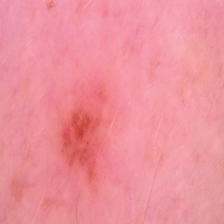

473.jpg


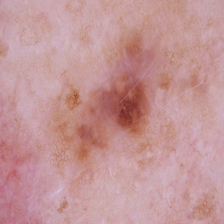

1792.jpg


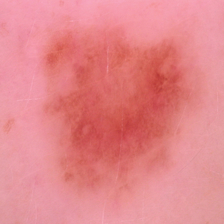

1411.jpg


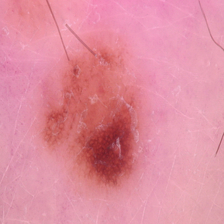

In [7]:
dir_benign=train_path+'/benign'
benignonly= [f for f in os.listdir(dir_benign) if os.path.isfile(os.path.join(dir_benign, f))]
print("Working with {0} images".format(len(benignonly)))
print("Image examples: ")


for i in range(10):
    print(benignonly[i])
    display(_Imgdis(filename=dir_benign + "/" + benignonly[i], width=240, height=240))

In [17]:
label = []
path = []

for dirname, _,filenames in os.walk(train_path):
    for filename in filenames:  #loop over the filenames in the current directory (dirname
        if os.path.splitext(filename)[-1]=='.jpg':  #3              # If filename contains .png
                label.append(os.path.split(dirname)[-1])   #5        # Append the directory name to label
                path.append(os.path.join(dirname,filename))  #6    # Append all the png files to path of that directory
train_df = pd.DataFrame(columns=['path','label'])
train_df['path']=path
train_df['label']=label
train_df

,path,label
0,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
1,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
2,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
3,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
4,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
...,...,...
2632,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
2633,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
2634,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
2635,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant


In [15]:
label = []
path = []

for dirname, _,filenames in os.walk(test_path):
    for filename in filenames:  #loop over the filenames in the current directory (dirname
        if os.path.splitext(filename)[-1]=='.jpg':  #3              # If filename contains .png
                label.append(os.path.split(dirname)[-1])   #5        # Append the directory name to label
                path.append(os.path.join(dirname,filename))  #6    # Append all the png files to path of that directory
test_df = pd.DataFrame(columns=['path','label'])
test_df['path']=path
test_df['label']=label
test_df




,path,label
0,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
1,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
2,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
3,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
4,/kaggle/input/skin-cancer-malignant-vs-benign/...,benign
...,...,...
655,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
656,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
657,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant
658,/kaggle/input/skin-cancer-malignant-vs-benign/...,malignant


In [21]:
print('train info:',train_df['label'].value_counts()) # number of datapoints in each category
print('trest info:',test_df['label'].value_counts()) # number of datapoints in each category

train info: label
benign       1440
malignant    1197
Name: count, dtype: int64
trest info: label
benign       360
malignant    300
Name: count, dtype: int64


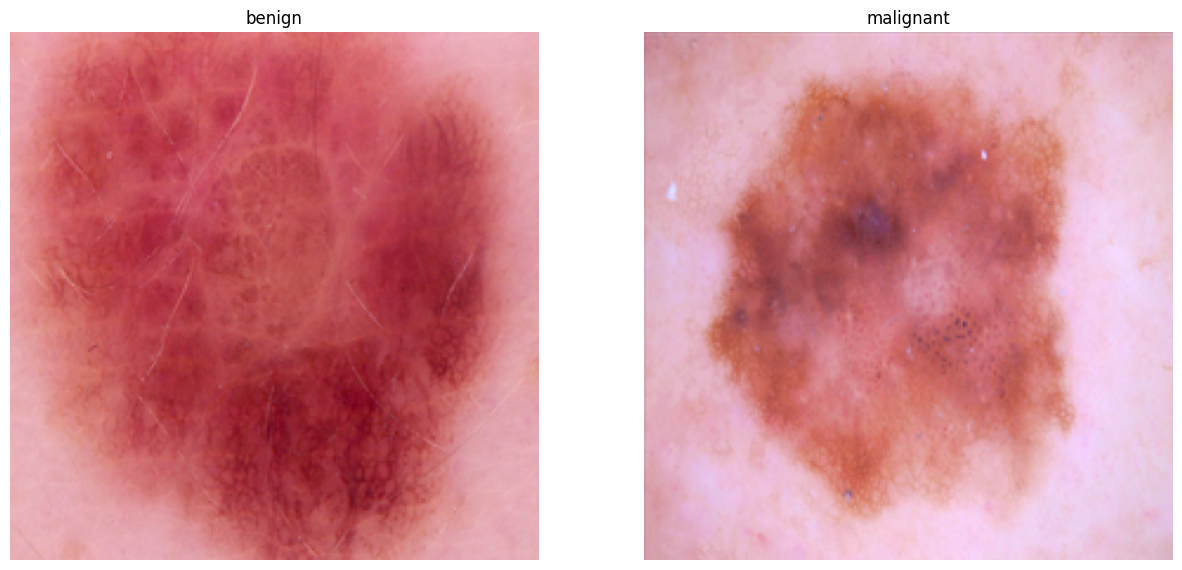

In [22]:
idx = 0
plt.figure(figsize=(15,12))
#df['label'].unique(): unique name of labels(name of benign or malignant)

for i in train_df['label'].unique():
    plt.subplot(1, 2, idx+1) #idx starts as 0    Defines a subplot within a grid of 3 by 3.
    #The idx+1 value determines the position of the subplot in the grid
    plt.imshow(plt.imread(train_df[train_df['label']==i].iloc[0,0]))
    plt.title(i)
    plt.axis('off')
    idx+=1

## **Importing the VGG16 and its modification**

In [23]:
#Image_size + [3] indicates that the input images should have a height and width defined by IMAGE_SIZE (e.g., [224, 224]) and a depth of 3 channels (RGB color images).
vgg_Model = VGG16(input_shape=Image_size + [3], weights='imagenet', include_top=False)


In [24]:
print(vgg_Model.input)
#for VGG model, we need to set trainable to False  layer by layer 
# freezing the parameter of layers
for layer in vgg_Model.layers:
  layer.trainable = False

KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'")


In [25]:
print((vgg_Model.output))

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='block5_pool/MaxPool:0', description="created by layer 'block5_pool'")


In [26]:

x = Flatten()(vgg_Model.output)
Model_Output = Dense(Class_No, activation='softmax')(x)
New_model = Model(inputs=vgg_Model.input, outputs=Model_Output) #defining a new model
New_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

### preparing ImageGenerators and data Augmentation

In [27]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input, validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [30]:
train_set  = train_datagen.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_set = train_datagen.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )

test_set  = test_datagen.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )
#  X_col='path'  path of images



Found 2110 validated image filenames belonging to 2 classes.
Found 527 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.


### Compiling and training

In [36]:
New_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
#save the best model based on the validation performance and track the training duration
from datetime import datetime
from keras.callbacks import ModelCheckpoint


#It saves the model to the file specified by the filepath parameter, only if the new model's performance is better than the previous best model.
checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

#model_history=New_model.fit_generator(train_set,validation_data=test_set,epochs=10,
 # steps_per_epoch=5,validation_steps=32,callbacks=callbacks ,verbose=2)
model_history=New_model.fit_generator(train_set,validation_data=val_set,epochs=50,callbacks=callbacks ,verbose=2)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50

Epoch 1: val_loss improved from inf to 7.72299, saving model to mymodel.h5
66/66 - 35s - loss: 3.1389 - accuracy: 0.8820 - val_loss: 7.7230 - val_accuracy: 0.7647 - 35s/epoch - 532ms/step
Epoch 2/50

Epoch 2: val_loss improved from 7.72299 to 6.86332, saving model to mymodel.h5
66/66 - 34s - loss: 2.8482 - accuracy: 0.8773 - val_loss: 6.8633 - val_accuracy: 0.8121 - 34s/epoch - 511ms/step
Epoch 3/50

Epoch 3: val_loss did not improve from 6.86332
66/66 - 33s - loss: 2.7344 - accuracy: 0.8810 - val_loss: 7.6517 - val_accuracy: 0.7723 - 33s/epoch - 506ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 6.86332
66/66 - 33s - loss: 2.2922 - accuracy: 0.8872 - val_loss: 8.3138 - val_accuracy: 0.7476 - 33s/epoch - 507ms/step
Epoch 5/50

Epoch 5: val_loss improved from 6.86332 to 5.92439, saving model to mymodel.h5
66/66 - 34s - loss: 2.6255 - accuracy: 0.8867 - val_loss: 5.9244 - val_accuracy: 0.8311 - 34s/epoch - 509ms/step
Epoch 6/50

Epoch 6: val_loss did not improve fr

**model.fit()** : This method is used when you have the entire dataset loaded into memory as NumPy arrays or tensors. You pass the input data (x) and the corresponding target data (y) directly to the model.fit() method. The method internally handles batching and shuffling of the data during training.
**model.fit_generator()** : This method is used when you have a large dataset that does not fit into memory and need to use a data generator to load the data in batches during training. Instead of passing the input and target data directly, you pass a data generator object (train_generator) to the model.fit_generator() method. The data generator is responsible for generating batches of data on-the-fly during training. 

In [32]:
display(train_set.class_indices)

{'benign': 0, 'malignant': 1}

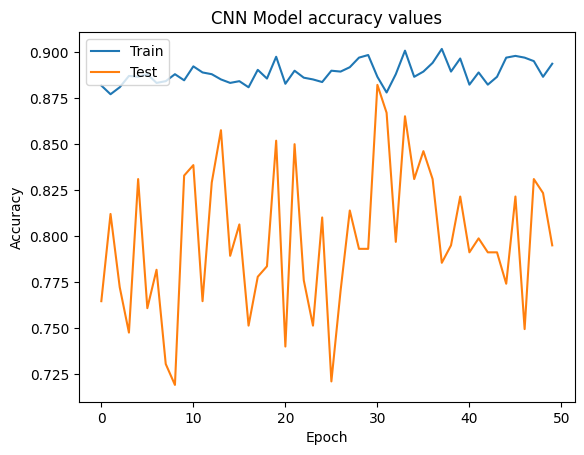

In [37]:
# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### if we have a test set and wants to test the save model on the test set


In [ ]:
from keras.models import load_model

# Load the saved model
saved_model = load_model('mymodel.h5')

# Assuming test_generator is your test set generator
predictions = saved_model.predict_generator(test_generator)

# Use the predictions for further analysis or evaluation